In [2]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [143]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('master_data.csv')
data.head()

,Unnamed: 0,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,coordinates,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile
0,0,1,3,2,2,01/01/2018,2,01:30,2,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854,"(51.524587, -0.139737)",9,0,18,0,0,0,0,0,0,1,1,6,1,32,6,1995,2,5,8,1,8
1,1,1,3,2,2,01/01/2018,2,01:30,2,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854,"(51.524587, -0.139737)",8,0,18,0,0,0,0,0,0,2,1,6,1,48,8,1798,8,6,1,1,1
2,2,1,3,1,1,01/01/2018,2,00:50,17,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531,"(51.539651, 0.046471)",9,0,18,0,2,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,3,1,3,2,1,01/01/2018,2,00:45,3,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723,"(51.529746, -0.102474)",8,0,7,0,8,0,0,0,0,1,1,1,1,40,7,1797,8,6,3,1,3
4,4,1,3,2,1,01/01/2018,2,00:45,3,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723,"(51.529746, -0.102474)",9,0,18,0,1,0,0,3,1,1,1,6,1,21,5,-1,-1,-1,5,1,5


In [144]:
data.shape

(211610, 49)

In [86]:
data.columns
#keep junction control drop detail, location, 

Index(['Unnamed: 0', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', '1st_road_class', '1st_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       '2nd_road_class', '2nd_road_number',
       'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location', 'coordinates', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicl

In [148]:
data.drop(columns=['junction_detail','junction_location'], axis=1 , inplace=True)

In [ ]:
data.drop(columns=['local_authority_(district)','junction_location'], axis=1 , inplace=True)

In [149]:
data.shape

(211610, 47)

In [151]:
data = data[data['number_of_casualties']< 50]

In [153]:
data.reset_index(drop=True, inplace=True)

In [165]:
data['1st_road_number'].value_counts()

0       24646
4         537
6         532
23        488
1         459
        ...  
7103        1
5018        1
4442        1
8476        1
4446        1
Name: 1st_road_number, Length: 2635, dtype: int64

In [154]:
master = data

In [155]:
master.replace(-1, np.nan,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [156]:
master.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
master

,Unnamed: 0,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),1st_road_class,1st_road_number,road_type,speed_limit,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,coordinates,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile
3,3,1,3,2,1,01/01/2018,2,00:45,3,3,1,6,20,4.0,5.0,0.0,0.0,5.0,4,1,1.0,0.0,0.0,1,1,E01002723,"(51.529746, -0.102474)",8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,40.0,7.0,1797.0,8.0,6.0,3.0,1.0,3.0
5,5,1,2,2,1,01/01/2018,2,03:00,17,4,167,3,30,2.0,3.0,124.0,0.0,5.0,4,2,2.0,0.0,0.0,1,1,E01003492,"(51.530179, 0.037828)",9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,27.0,6.0,1200.0,1.0,1.0,7.0,1.0,7.0
11,11,1,2,2,1,01/01/2018,2,05:47,12,5,0,6,30,4.0,5.0,0.0,0.0,0.0,4,1,1.0,0.0,0.0,1,1,E01002886,"(51.514545, -0.199239)",8.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,66.0,10.0,2499.0,2.0,5.0,3.0,1.0,3.0
13,13,1,3,3,1,01/01/2018,2,04:40,7,3,20,2,30,4.0,3.0,20.0,0.0,0.0,7,1,1.0,0.0,0.0,1,1,E01003215,"(51.475091, -0.032886)",8.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,36.0,7.0,1798.0,8.0,2.0,3.0,1.0,3.0
16,16,1,3,2,1,01/01/2018,2,00:30,28,6,0,6,30,4.0,6.0,0.0,0.0,8.0,4,1,1.0,0.0,0.0,1,1,E01000564,"(51.56325, -0.311872)",9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,24.0,5.0,998.0,1.0,9.0,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211505,211508,63,2,3,4,20/10/2018,7,18:59,753,3,458,6,50,4.0,6.0,0.0,0.0,0.0,6,1,1.0,0.0,0.0,2,1,W01000497,"(52.676513, -3.096952)",9.0,0.0,18.0,0.0,0.0,0.0,1.0,10.0,3.0,1.0,6.0,1.0,57.0,9.0,1998.0,2.0,12.0,1.0,1.0,1.0
211544,211547,63,3,4,3,18/11/2018,1,09:42,753,3,483,6,50,4.0,6.0,0.0,0.0,0.0,1,1,1.0,0.0,0.0,2,1,W01000428,"(52.586426, -3.190648)",9.0,0.0,18.0,0.0,0.0,0.0,1.0,10.0,2.0,1.0,6.0,1.0,30.0,6.0,1198.0,1.0,11.0,2.0,1.0,2.0
211547,211550,63,3,2,1,18/11/2018,1,14:35,753,3,488,6,60,4.0,6.0,0.0,0.0,0.0,1,1,1.0,0.0,0.0,2,1,W01000464,"(52.29757, -3.2331830000000004)",9.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,49.0,8.0,1685.0,2.0,5.0,1.0,1.0,1.0
211551,211554,63,3,1,1,21/11/2018,4,00:22,753,3,40,6,60,4.0,6.0,0.0,0.0,0.0,6,1,2.0,0.0,0.0,2,1,W01000474,"(51.951469, -3.52736)",9.0,0.0,18.0,0.0,2.0,0.0,2.0,4.0,1.0,1.0,6.0,1.0,37.0,7.0,1149.0,1.0,6.0,4.0,1.0,4.0


In [159]:
master.accident_severity.value_counts()

3    57296
2    12471
1      629
Name: accident_severity, dtype: int64

In [166]:
master['vehicle_imd_decile'].value_counts()

2.0     8535
1.0     8425
3.0     8083
4.0     7898
5.0     7264
6.0     6871
7.0     6409
8.0     6152
9.0     5696
10.0    5063
Name: vehicle_imd_decile, dtype: int64

In [178]:
master['age_band_of_driver'].value_counts()

6.0     16564
7.0     13718
8.0     12346
5.0      8062
9.0      7608
4.0      5118
10.0     4194
11.0     2753
3.0        32
2.0         1
Name: age_band_of_driver, dtype: int64

In [195]:
master.drop(columns=['local_authority_(district)','Unnamed: 0'], axis=1 , inplace=True)

In [196]:
master.columns

Index(['police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time', '1st_road_class',
       '1st_road_number', 'road_type', 'speed_limit', 'junction_control',
       '2nd_road_class', '2nd_road_number',
       'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location', 'coordinates', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'skidding_and_overturning',
       'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', '1st_point_of_impact',
       'was_vehicle_left_hand_drive?', 'journey_purpose_of_driver',
       'sex_of_driver', 'age_of_driver', 

In [197]:
master.reset_index(drop=True, inplace=True)

# EDA 

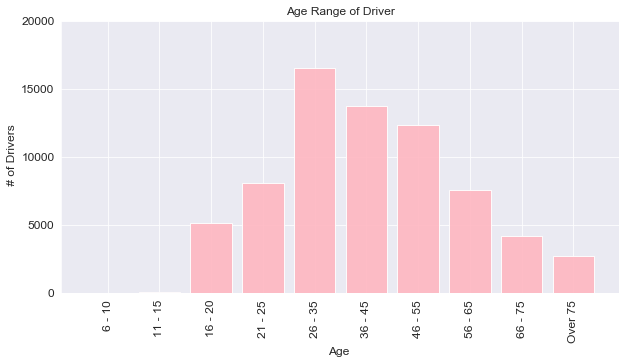

In [272]:
### .plt
new_figure = plt.figure(figsize= (10,5))
### Setting the X-values to a variable 
objects = '6 - 10','11 - 15','16 - 20','21 - 25','26 - 35','36 - 45','46 - 55','56 - 65','66 - 75','Over 75'
### Setting Y-values to a variable
variable = [1,32,5118,8062,16562,13718,12346,7608,4194,2753]
### Code to graph bar graph with color, alignment, and color of bars 
plt.bar(objects, variable, align='center', alpha=0.9, color='lightpink')
### Set X-ticks 
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
### Set Y-ticks 
plt.yticks(np.arange(0, 21000, step=5000),fontsize=12)
### Y-axis label
plt.ylabel(' # of Drivers',fontsize=12)
### X-axis label
plt.xlabel('Age ',fontsize=12)
### Set title
plt.title('Age Range of Driver',fontsize=12)

### Show graph
plt.show()


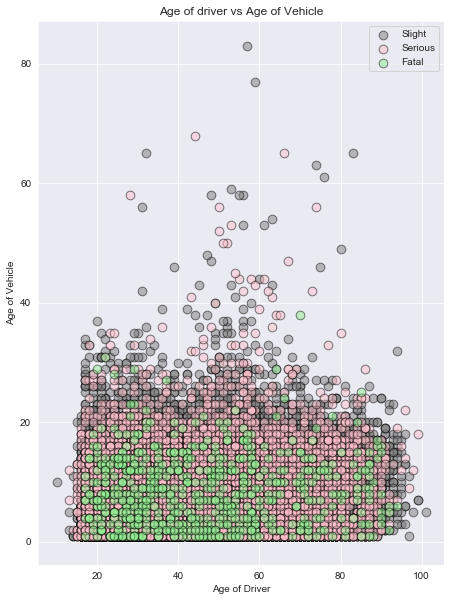

In [251]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax3 = fig.add_subplot(122)
ax3.scatter(x = master[master['accident_severity']==3].age_of_driver, y = master[master['accident_severity']==3].age_of_vehicle,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Slight')
ax3.scatter(x = master[master['accident_severity']==2].age_of_driver, y = master[master['accident_severity']==2].age_of_vehicle,
                        alpha = .50,edgecolors= 'black',  c = 'pink', s= 75, label = 'Serious')
ax3.scatter(x = master[master['accident_severity']==1].age_of_driver, y = master[master['accident_severity']==1].age_of_vehicle,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Fatal')
ax3.set_xlabel('Age of Driver')
ax3.set_ylabel('Age of Vehicle')
ax3.set_title('Age of driver vs Age of Vehicle')
ax3.legend()

plt.show()

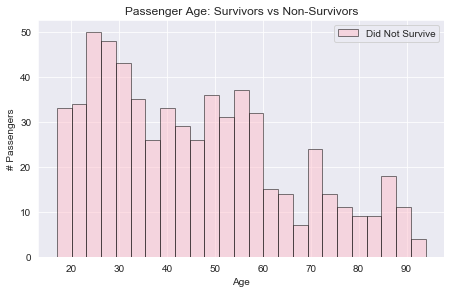

In [276]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(master[master['accident_severity'] ==1].age_of_driver, bins = 25, label ='Did Not Survive', alpha = .50, edgecolor = 'black',color = 'pink')
#ax1.hist(master[master['accident_severity']==2].age_of_driver, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')
plt.show()


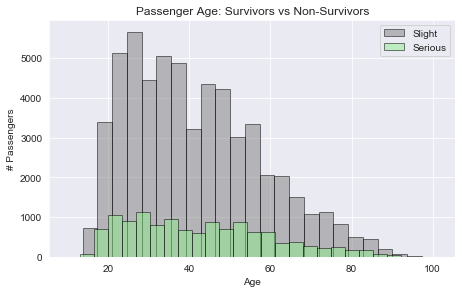

In [281]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(master[master['accident_severity'] ==3].age_of_driver, bins = 25, label ='Slight', alpha = .50, edgecolor = 'black',color = 'grey')
ax1.hist(master[master['accident_severity']==2].age_of_driver, bins = 25, label = 'Serious', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')
plt.show()


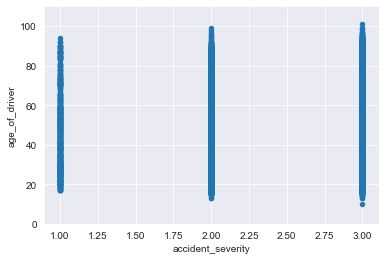

In [245]:
var = 'accident_severity'
data = pd.concat([master['age_of_driver'], master[var]], axis=1)
data.plot.scatter(x=var, y='age_of_driver', ylim=(0,110));

In [235]:
master['age_of_vehicle'].describe()

count    70396.000000
mean         8.131925
std          5.322021
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         83.000000
Name: age_of_vehicle, dtype: float64

3    57296
2    12471
1      629
Name: accident_severity, dtype: int64


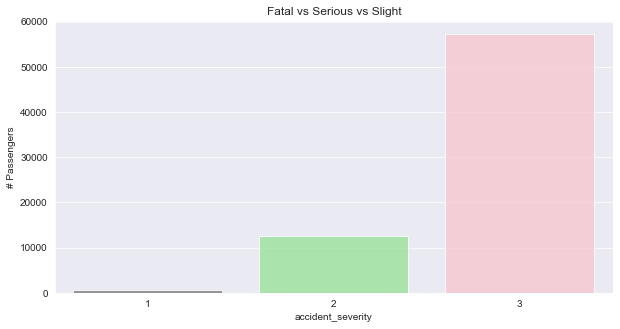

In [263]:
print(master.accident_severity.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(master['accident_severity'], alpha =.80, palette= ['grey','lightgreen','pink'])
plt.title('Fatal vs Serious vs Slight')
plt.ylabel('# Passengers')
plt.show()

In [200]:
corr = master.corr()


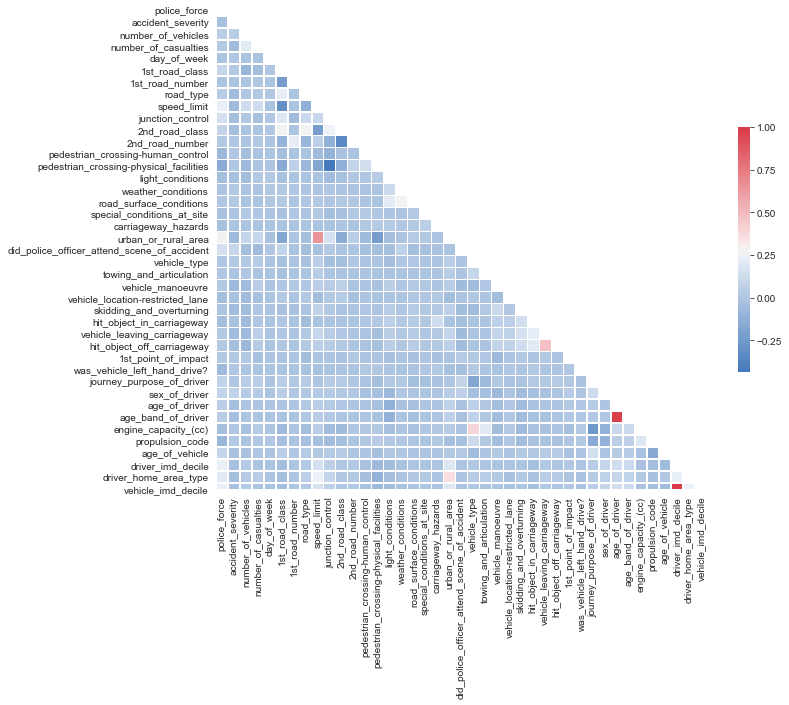

In [201]:
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

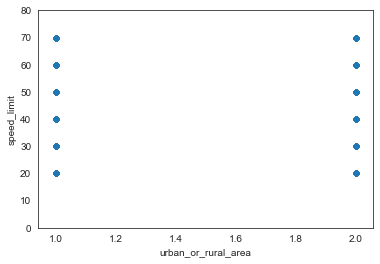

In [208]:
var = 'urban_or_rural_area'
data = pd.concat([master['speed_limit'], master[var]], axis=1)
data.plot.scatter(x=var, y='speed_limit', ylim=(0,80));

In [ ]:
var = 'urban_or_rural_area'
data = pd.concat([master['sex_'], master[var]], axis=1)
data.plot.scatter(x=var, y='speed_limit', ylim=(0,80));

In [212]:
master.shape

(70396, 45)

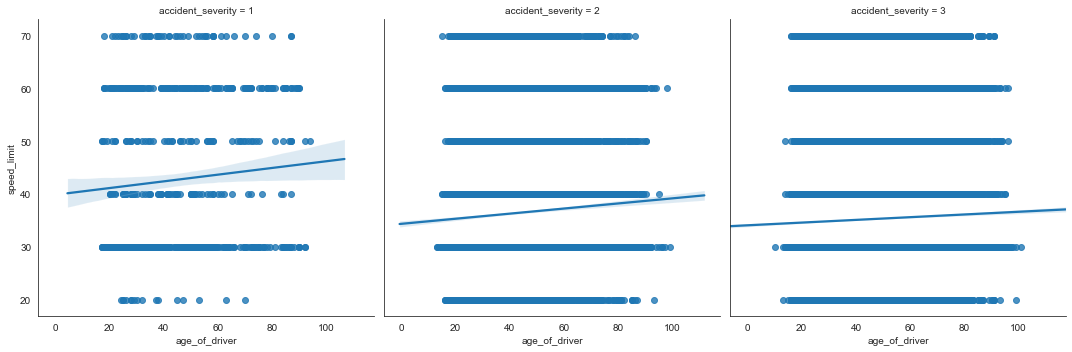

In [217]:

sns.lmplot(x = 'age_of_driver', y = 'speed_limit', data = master, col = 'accident_severity')


plt.show()

In [228]:
master['number_of_casualties'].describe()

count    70396.000000
mean         1.403560
std          0.818601
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: number_of_casualties, dtype: float64